# Data download

In [ ]:
pip install GEOparse
#https://github.com/guma44/GEOparse

Python library to access Gene Expression Omnibus Database (GEO).

GEOparse is python package that can be used to query and retrieve data from Gene Expression Omnibus database (GEO). The inspiration and the base for it is great R library GEOquery.

Free software: BSD license
Documentation: https://GEOparse.readthedocs.org.

In [ ]:
#gse_id = "GSE157103"
#gse = GEOparse.get_GEO(geo=gse_id, destdir="./")
#sample info:	Identification of five cytotoxicity-related genes involved in the progression of breast cancer
import urllib.request

# counts
url_counts = "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE157nnn/GSE157103/suppl/GSE157103_genes.ec.tsv.gz"
urllib.request.urlretrieve(url_counts, "GSE157103_genes.ec.tsv.gz")

# TPM
url_tpm = "ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE157nnn/GSE157103/suppl/GSE157103_genes.tpm.tsv.gz"
urllib.request.urlretrieve(url_tpm, "GSE157103_genes.tpm.tsv.gz")

print("✅ down")


In [1]:
import GEOparse

# read & preprocessing  RNA-seq

In [3]:
import pandas as pd

# read TPM
df = pd.read_csv("GSE157103_genes.tpm.tsv", sep="\t",index_col=0)

print(df.head())
print(df.columns)


           C1    C2    C3    C4    C5    C6    C7    C8    C9   C10  ...  \
#symbol                                                              ...   
A1BG     0.49  0.29  0.26  0.45  0.17  0.21  0.49  0.12  0.51  0.10  ...   
A1CF     0.00  0.00  0.00  0.01  0.00  0.00  0.01  0.00  0.01  0.00  ...   
A2M      0.21  0.14  0.03  0.09  0.00  0.08  0.23  0.08  0.88  0.13  ...   
A2ML1    0.04  0.00  0.02  0.07  0.05  0.04  0.03  0.01  0.02  0.01  ...   
A3GALT2  0.07  0.00  0.00  0.00  0.07  0.00  0.07  0.00  0.79  0.15  ...   

         NC17  NC18  NC19  NC20  NC21  NC22  NC23  NC24  NC25  NC26  
#symbol                                                              
A1BG     0.37  0.33  0.25  0.20  0.40  0.30  0.70  0.75  2.80  0.22  
A1CF     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  
A2M      0.07  0.06  0.11  0.01  0.04  0.02  0.02  0.27  0.04  0.28  
A2ML1    0.01  0.00  0.00  0.02  0.02  0.02  0.01  0.00  0.00  0.00  
A3GALT2  0.18  0.00  0.04  0.00  0.00  0.00  0.

In [10]:
# info
print(df.info())

# missingvalue---> 0
print(df.isnull().sum())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 19472 entries, A1BG to ZZZ3
Columns: 126 entries, C1 to NC26
dtypes: float64(126)
memory usage: 19.4+ MB
None
C1      0
C2      0
C3      0
C4      0
C5      0
       ..
NC22    0
NC23    0
NC24    0
NC25    0
NC26    0
Length: 126, dtype: int64
                 C1            C2            C3            C4            C5  \
count  19472.000000  19472.000000  19472.000000  19472.000000   19472.00000   
mean      51.355792     51.355807     51.355800     51.355776      51.35579   
std      734.265978    762.410285   1075.540652    562.286149    1270.47109   
min        0.000000      0.000000      0.000000      0.000000       0.00000   
25%        0.030000      0.040000      0.020000      0.050000       0.02000   
50%        2.470000      2.460000      1.250000      2.965000       1.20500   
75%       17.182500     15.220000     10.690000     17.962500      10.26000   
max    64587.480000  69854.370000  96300.100000  33241.960000  144022.37000  

## normalization

In [11]:
import numpy as np

# Log2(TPM + 1) 
df_log2 = np.log2(df + 1)
df_log2.describe()


,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,NC17,NC18,NC19,NC20,NC21,NC22,NC23,NC24,NC25,NC26
count,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,...,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000,19472.000000
mean,2.415228,2.365346,2.075060,2.481833,2.052603,2.272456,2.530194,2.095405,2.326871,2.140171,...,2.311125,1.875901,1.814971,2.001270,2.025537,1.742198,1.981165,2.281958,1.800145,1.461397
std,2.507654,2.448029,2.391773,2.487833,2.376374,2.388079,2.473351,2.367116,2.436580,2.344398,...,2.447111,2.271652,2.231121,2.332483,2.312793,2.162627,2.325208,2.422573,2.232676,2.029235
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.042644,0.056584,0.028569,0.070389,0.028569,0.056584,0.084064,0.028569,0.042644,0.042644,...,0.056584,0.014355,0.014355,0.028569,0.028569,0.028569,0.028569,0.056584,0.014355,0.000000
50%,1.794936,1.790772,1.169925,1.987320,1.140775,1.673556,2.134221,1.269033,1.722466,1.427606,...,1.641546,0.944854,0.879706,1.117695,1.232661,0.855990,1.077243,1.627607,0.883616,0.505891
75%,4.184479,4.019702,3.547203,4.245077,3.493135,3.851249,4.314153,3.592457,3.998196,3.649903,...,3.981168,3.155425,3.056584,3.368768,3.397803,2.865919,3.327687,3.890690,2.929791,2.266037
max,15.978989,16.092083,16.555265,15.020761,17.135943,16.761744,15.189373,16.802954,16.210243,16.854171,...,15.968939,16.979519,17.442250,16.781832,16.147082,17.344804,16.551633,15.033549,15.383703,18.052403


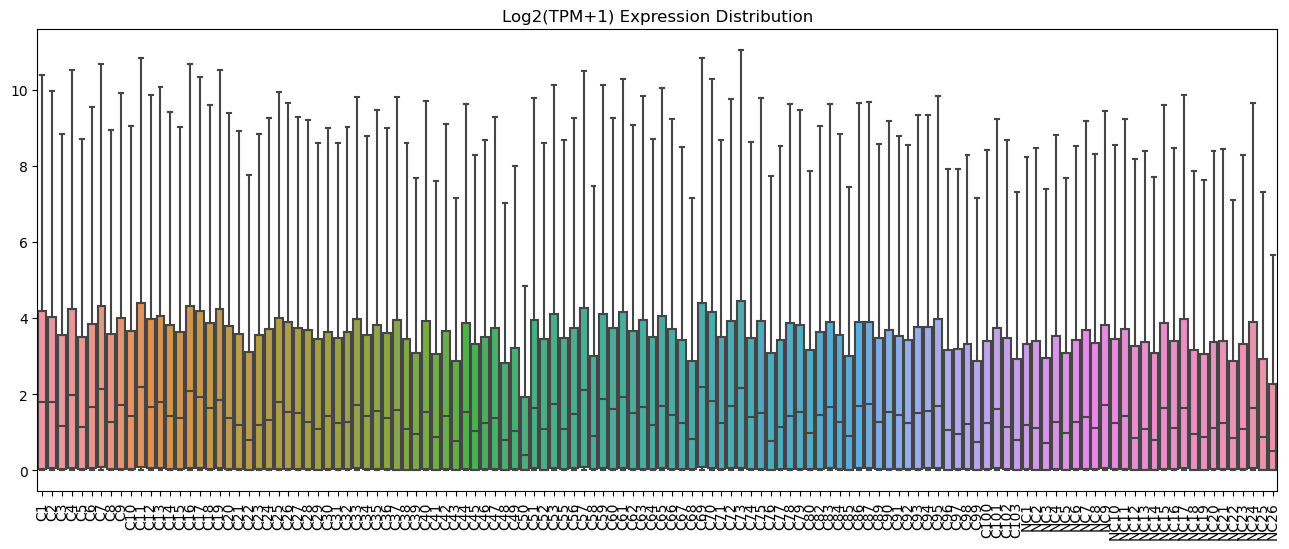

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))
sns.boxplot(data=df_log2, showfliers=False)  
plt.xticks(rotation=90) 
plt.title("Log2(TPM+1) Expression Distribution")
plt.show()


In [17]:
#filter gene lower than mean,since lower expression could be noise
mean_expression = df_log2.mean(axis=1)
#print(mean_expression)
df_filtered = df_log2[mean_expression > 1]

print(f"gene_after_filtered: {df_filtered.shape[0]}")


#symbol
A1BG       0.422679
A1CF       0.003187
A2M        0.159262
A2ML1      0.019990
A3GALT2    0.153628
             ...   
ZYG11A     0.205876
ZYG11B     2.498509
ZYX        8.445012
ZZEF1      3.224745
ZZZ3       1.874550
Length: 19472, dtype: float64
gene_after_filtered: 10683


## Differentially Expressed Genes

In [20]:
control_samples = [f"NC{i}" for i in range(1, 27)]  #  ['NC1'-NC26']
treatment_samples = [f"C{i}" for i in range(1, 27)]  #  ['C1', - 'C26']


In [21]:
from scipy.stats import ttest_ind
import pandas as pd


control_df = df_filtered[control_samples]
treatment_df = df_filtered[treatment_samples]

# log2 Fold Change & P value
deg_results = pd.DataFrame(index=df_filtered.index)
deg_results['log2FC'] = treatment_df.mean(axis=1) - control_df.mean(axis=1)
deg_results['p_value'] = [ttest_ind(treatment_df.loc[gene], control_df.loc[gene], equal_var=False)[1] for gene in df_filtered.index]

# 设定差异表达基因阈值 (|log2FC| > 1 & p < 0.05)
deg_results['significant'] = (abs(deg_results['log2FC']) > 1) & (deg_results['p_value'] < 0.05)

# only take significant
top_deg = deg_results[deg_results['significant']].sort_values(by='log2FC', ascending=False)

print(f" significantly differentially expressed genes : {top_deg.shape[0]}")
top_deg.head(10)  


显著差异表达基因数: 1735


,log2FC,p_value,significant
#symbol,,,
IGHG1,5.481369,6.472940e-10,True
JCHAIN,4.776487,3.989374e-11,True
IGHG3,4.054254,7.844190e-09,True
IFI27,3.751965,5.454710e-07,True
IGLC2,3.551713,4.687252e-07,True
TXNDC5,3.361476,7.396815e-12,True
IGLC1,3.205369,7.901975e-06,True
TNFRSF17,3.125326,1.155644e-09,True
IGLC3,3.123041,9.726729e-07,True


## Volcano Plot

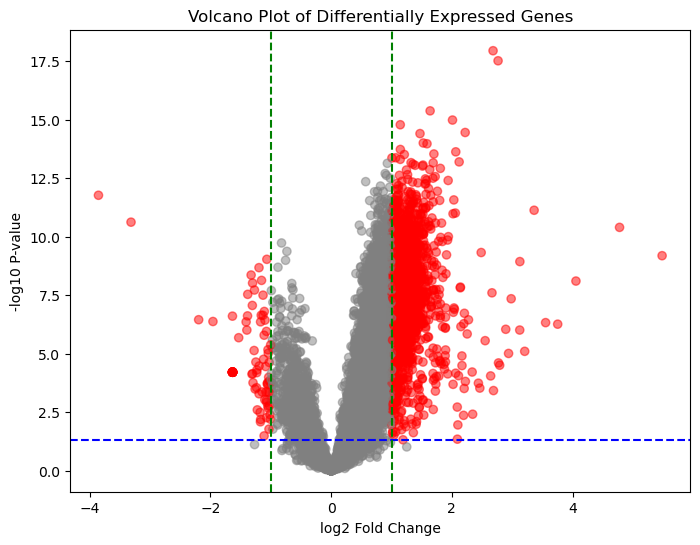

In [22]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(deg_results['log2FC'], -np.log10(deg_results['p_value']), 
            c=deg_results['significant'].map({True: 'red', False: 'grey'}), alpha=0.5)
plt.axhline(y=-np.log10(0.05), linestyle='dashed', color='blue')  # p=0.05 threshold
plt.axvline(x=1, linestyle='dashed', color='green')  # log2FC > 1
plt.axvline(x=-1, linestyle='dashed', color='green')  # log2FC < -1
plt.xlabel("log2 Fold Change")
plt.ylabel("-log10 P-value")
plt.title("Volcano Plot of Differentially Expressed Genes")
plt.show()
